## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [19]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [20]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [21]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

model = build_mlp()

In [22]:
"""
Compile 模型
"""

model.summary()

#optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.6, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [23]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 304us/step - loss: 2.3580 - acc: 0.0985 - val_loss: 2.3587 - val_acc: 0.1017
Epoch 2/100
50000/50000 [==============================] - 13s 262us/step - loss: 2.3448 - acc: 0.1048 - val_loss: 2.3465 - val_acc: 0.1063
Epoch 3/100
50000/50000 [==============================] - 13s 265us/step - loss: 2.3341 - acc: 0.1104 - val_loss: 2.3365 - val_acc: 0.1129
Epoch 4/100
50000/50000 [==============================] - 13s 265us/step - loss: 2.3253 - acc: 0.1153 - val_loss: 2.3281 - val_acc: 0.1171
Epoch 5/100
50000/50000 [==============================] - 13s 267us/step - loss: 2.3179 - acc: 0.1200 - val_loss: 2.3210 - val_acc: 0.1217
Epoch 6/100
50000/50000 [==============================] - 13s 269us/step - loss: 2.3114 - acc: 0.1238 - val_loss: 2.3147 - val_acc: 0.1252
Epoch 7/100
50000/50000 [==============================] - 16s 315us/step - loss: 2.3058 - acc: 0.1271 - val_l

Epoch 59/100
50000/50000 [==============================] - 13s 254us/step - loss: 2.1828 - acc: 0.2296 - val_loss: 2.1853 - val_acc: 0.2281
Epoch 60/100
50000/50000 [==============================] - 13s 252us/step - loss: 2.1813 - acc: 0.2306 - val_loss: 2.1838 - val_acc: 0.2295
Epoch 61/100
50000/50000 [==============================] - 13s 252us/step - loss: 2.1798 - acc: 0.2315 - val_loss: 2.1823 - val_acc: 0.2302
Epoch 62/100
50000/50000 [==============================] - 13s 255us/step - loss: 2.1784 - acc: 0.2325 - val_loss: 2.1808 - val_acc: 0.2308
Epoch 63/100
50000/50000 [==============================] - 13s 254us/step - loss: 2.1769 - acc: 0.2336 - val_loss: 2.1793 - val_acc: 0.2329
Epoch 64/100
50000/50000 [==============================] - 13s 253us/step - loss: 2.1755 - acc: 0.2343 - val_loss: 2.1778 - val_acc: 0.2337
Epoch 65/100
50000/50000 [==============================] - 13s 252us/step - loss: 2.1740 - acc: 0.2352 - val_loss: 2.1763 - val_acc: 0.2353
Epoch 66/100


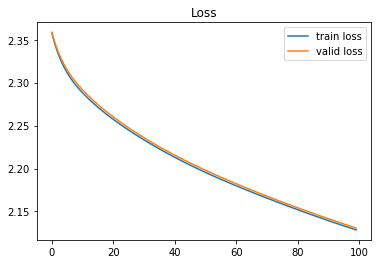

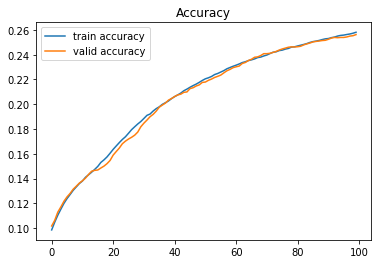

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程
#Adam

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

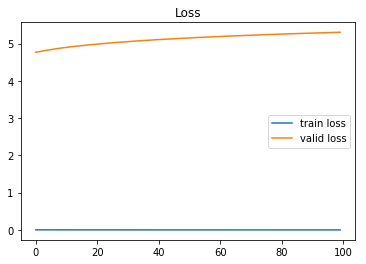

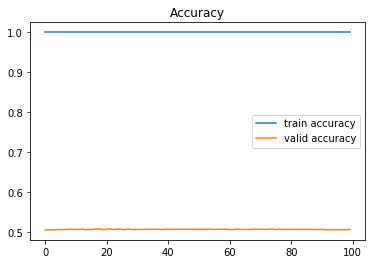

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程
#SGD

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
Answer: loss: 0.0043 - acc: 0.9999 - val_loss: 4.7312 - val_acc: 0.5019
大概跑了20 epochs後，就overfitting了

2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢
Answer: loss: 2.1285 - acc: 0.2581 - val_loss: 2.1307 - val_acc: 0.2562